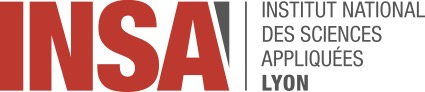
# P2I7: Chapitre 8 méthodes numériques
## La méthode des différences finies (2D)
Camille Carvalho (INSA/ICJ)

In [1]:
#libraries to import
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import sympy as sp

Soit une plaque carrée de coté 1m. On veut connaître la répartition de température $T(x,y)$ dans cette plaque, exprimée en degrés Celsius.

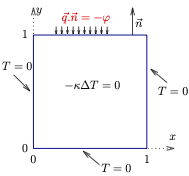

Ce qui était une équation différentielle (1D) dans le cours précèdent devient ici une équation aux dérivées partielles EDP (2D = 2 variables). Il faut résoudre l'équation de Laplace :
$$ -\kappa\Delta T(x,y) = 0  ~~\Longleftrightarrow ~~ -\left(\frac{\partial^2 T}{\partial x^2} + \frac{\partial^2 T}{\partial y^2}\right) = 0, $$
avec les conditions aux limites :
$$ T(0,y) = T(x,0) = T(1,y) = 0, $$
$$ \vec{q}\cdot\vec{n} = -\kappa\frac{\partial T}{\partial y}(x,1) = -\varphi, ~~~~ \mbox{soit encore } ~ \frac{\partial T}{\partial y}(x,1) = \frac{\varphi}{\kappa} = 300, $$
$\vec{n}$ étant la normale unitaire extérieure au domaine, $\vec{q}$ le flux de chaleur et $\varphi$ le flux normal rentrant imposé sur le bord supérieur, que l'on prend égal à $300\kappa$. 


## Section 8.6: Exercice


On propose de discrétiser la plaque avec N noeuds selon chaque
direction $x$ et $y$ (en incluant les bords). Les conditions de Dirichlet
n'apporteront pas de lignes inutiles au système d'équation.

**Question 1.** Combien de lignes/colonnes comporte la matrice du système à résoudre ?

In [2]:
#NxN

**Question 2.** Écrire le système matriciel.

In [3]:
#A vous de jouer !

**Question 3.** Construire un programme Python qui résout ce système et dessine le résultat.

**Attention** : ne pas confondre les lignes de la matrice (indice $k$), avec
les abscisses/ordonnées sur la plaque ($i$ et $j$). On pourra balayer les
indices géométriques $i$ et $j$, et pour chaque couple $i,j$ en déduire
l'indice $k$ selon le sens de parcours des noeuds choisi.

In [7]:
from numpy import linalg as la
def difference_finies_2d(T0, T1, M):
    '''
    function that approximates the PDE  -Δu = 0, u(x,0) =  u(0,y) = u(1,y) = T0, du/dy(x,1) = T1
    using finite differences
   
    Parameters
    ==========
    T0: float number, boundary parameter 
    T1: float number,  boundary parameter
    M: integer, number of space subintervals
    
    Returns
    =======
    The sampled space x,y , as meshgrid
    The solution u, as a matrix of values
    '''    
    
    #discretization of space
    xx, h = np.linspace(0, 1, M, endpoint = True, retstep=True)
    x, y = np.meshgrid(xx, xx)
    
    #Step 1: create spatial discretization of the system leading to u'= B-Au
    A = np.zeros((M*M,M*M))
    B = np.zeros((M*M,1))
    u = np.zeros((M,M))
    #Matrice des noeuds internes
    for i in range(1, M-1):
        for j in range(1, M-1):
            k = M*i+j
            A[k,k]=4/h**2
            A[k,k+1]=-1/h**2
            A[k,k-1]=-1/h**2
            A[k,k+M]=-1/h**2
            A[k,k-M]=-1/h**2
    for i in [0, M-1]:
        for j in range(0, M):
            k = M*i+j
            A[k,k] = 1 
            B[k] = T0
    for j in [0, M-1]:
        for i in range(1, M-1):
            k = M*i+j
            if j == 0:
                A[k,k] = 1 
                B[k] = T0
            else:
                A[k,k]=3/(2*h)
                A[k,k+1]=-4/(2*h)
                A[k,k+2]=1/(2*h)
                B[k] = T1
    V = np.linalg.solve(A,B)
    for i in range(0,M):
        for j in range(0,M):
            k = M*i+j
            u[i][j] = V[k]
    return x, y, u

**Question 4.** Tracer un graphe de surface qui décrit la température sur la
plaque, puis tracer dans un deuxième graphe le champ de température
uniquement sur le bord supérieur de la plaque. La solution est-elle
régulière ? Symétrique ? Les conditions aux limites sont-elles
vérifiées ?

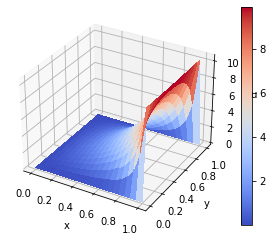

In [8]:
x,y,u = difference_finies_2d(0, 300, 20)
from mpl_toolkits.mplot3d import Axes3D 
from matplotlib import cm
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(x, y, u, linewidth=0, 
                       antialiased=False, cmap=cm.coolwarm)
fig.colorbar(surf)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u')
plt.show()

**Question 5.**
On a choisi un pas $h = \Delta x = \Delta y$ de maillage (discrétisation) qui est
totalement arbitraire. Or il ne faut pas que la solution obtenue
dépende de ce choix arbitraire (qui n'a rien à voir avec le problème physique de départ). 

Pour s'affranchir de ce choix, on diminue le pas $h$ jusqu'à ce que le résultat
n'en dépende plus sensiblement. Quantifier l'écart relatif $\varepsilon$ sur le résultat pour deux choix successifs de maillage :
$$ \varepsilon = \frac{\|T_{grossier} - T_{fin}\|}{\|T_{fin}\|}. $$

In [6]:
from scipy import interpolate
NN = [i*10 for i in range(1, 2)]
xf, yf, uf = difference_finies_2d(0, 300, 50)
print(uf.shape)
error = np.zeros((len(NN)))
for i, N in enumerate(NN):
    x, y, u = difference_finies_2d(0, 300, N)
    #uf_interp  = interpolate.interp2d(x, y, uf, kind='cubic')
    #print(uf_interp)
    #error[i] = np.abs(u-uf_interp)/np.abs(uf)

(50, 50)


**Question 6.** Pour quel pas $h$ l'erreur relative devient-elle inférieure à 1% ?